## Final Project: Global Land-Ocean Temperature Index Data Set Analysis
### By Mitra Iyer
### December 17th, 2025

#### imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read in CSV

In [81]:
df = pd.read_csv("global-land-oceantempindex_cleaned.csv")

In [82]:
df.head()

,year,temp anomaly,smoothed temp anomaly
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


## Question 1: Does the global mean temperature anomaly show evidence of accelerating warming since 1880?

#### make the year and temp anomaly variables

In [54]:
year = df["year"].values
temp_anomaly = df["temp anomaly"].values

#### get the linear coefficients and the linear fit values

In [55]:
linear_coeffs = np.polyfit(year, temp_anomaly, 1)  # degree 1
linear_fit = np.polyval(linear_coeffs, year)

#### get the quadratic values to check acceleration

In [56]:
quad_coeffs = np.polyfit(year, temp_anomaly, 2)  # degree 2
quad_fit = np.polyval(quad_coeffs, year)

#### plotting

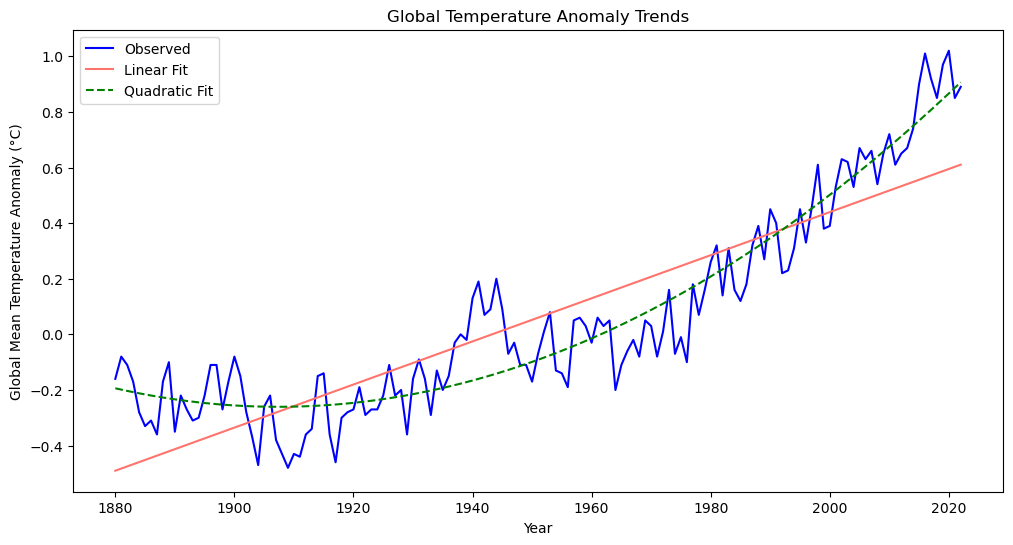

In [57]:
plt.figure(figsize=(12,6))
plt.plot(year, temp_anomaly, label='Observed', color='blue')
plt.plot(year, linear_fit, label='Linear Fit', color='#FF746C')
plt.plot(year, quad_fit, label='Quadratic Fit', color='green', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly (°C)')
plt.title('Global Temperature Anomaly Trends')
plt.legend()
plt.savefig("my_plot1.png") 
plt.show()


In [58]:
plt.savefig("my_plot1.png") 

<Figure size 640x480 with 0 Axes>

#### print out the quadratic coefficient to show acceleration

In [59]:
print(f"Quadratic coefficient = {quad_coeffs[0]:.6f}")
if quad_coeffs[0] > 0:
    print("Positive quadratic term suggests accelerating warming.")
else:
    print("No evidence of acceleration.")

Quadratic coefficient = 0.000089
Positive quadratic term suggests accelerating warming.


### Conclusion: This graph and results show evidence of accelerated warming, due to the positive quadratic coefficient and upwards trends in the graph. 

## Question 2: What is the rate of warming per decade, and has that rate accelerated?

#### check columns

In [60]:
df.columns

Index(['year', 'temp anomaly', 'smoothed temp anomaly'], dtype='object')

#### check decades

In [61]:
df["Decade"] = (df["year"] // 10) * 10

#### find decade averages

In [62]:
decade_avg = df.groupby("Decade")["temp anomaly"].mean()

#### find linear coefficents and warming rates

In [63]:
coeffs = np.polyfit(decade_avg.index, decade_avg.values, 1)
warming_rate_per_decade = coeffs[0] * 10 

#### plot the figure 

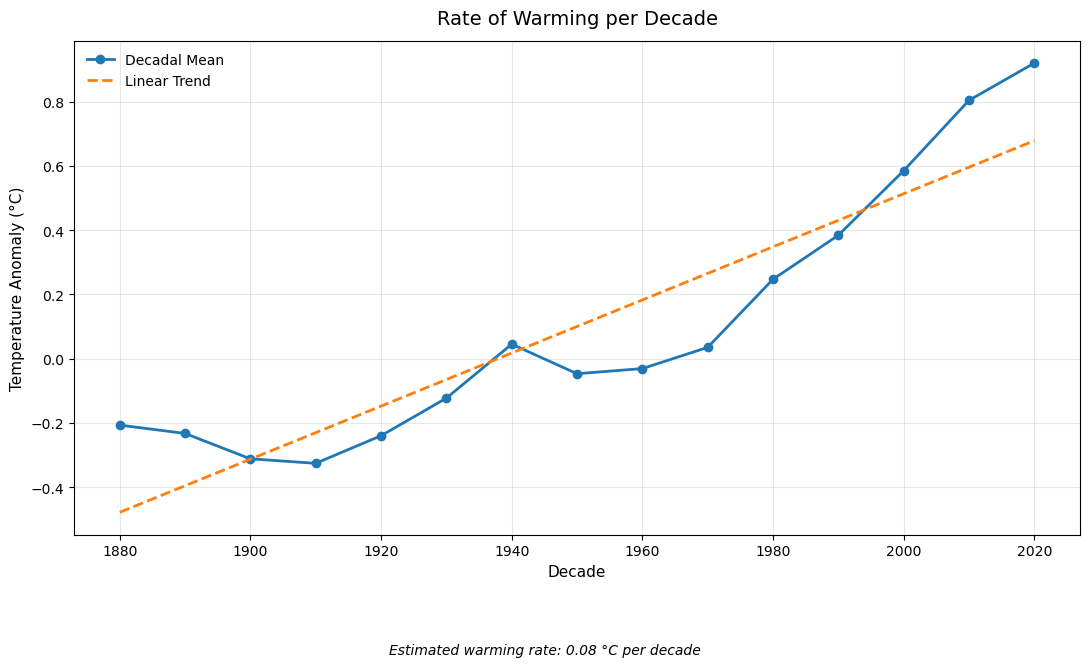

In [64]:
plt.figure(figsize=(11,6))

plt.plot(
    decade_avg.index,
    decade_avg.values,
    marker='o',
    linewidth=2,
    label="Decadal Mean"
)

plt.plot(
    decade_avg.index,
    np.polyval(coeffs, decade_avg.index),
    linestyle='--',
    linewidth=2,
    label="Linear Trend"
)

plt.xlabel("Decade", fontsize=11)
plt.ylabel("Temperature Anomaly (°C)", fontsize=11)
plt.title("Rate of Warming per Decade", fontsize=14, pad=12)

plt.legend(frameon=False)
plt.grid(alpha=0.3)

plt.figtext(
    0.5, -0.10,
    f"Estimated warming rate: {warming_rate_per_decade:.2f} °C per decade",
    ha="center",
    fontsize=10,
    style="italic"
)

plt.tight_layout()
plt.show()


#### print out the warming rate

In [65]:
print(f"Warming rate: {warming_rate_per_decade:.2f} °C per decade")

Warming rate: 0.08 °C per decade


#### find warming rate (how fast it's accelerating)

In [66]:
quad_coeffs = np.polyfit(decade_avg.index, decade_avg.values, 2)
a, b, c = quad_coeffs
warming_acceleration = 2 * a

In [67]:
print(f"Warming acceleration: {warming_acceleration:.4f} °C per decade²")

Warming acceleration: 0.0002 °C per decade²


### Conclusion: The warming rate of each decade is shown to increase over the years. From 1950, it starts to increase more, and there were dips from 1880 to 1940, and from 1940 to 1960.

## Question 3: Are there detectable periodic patterns in temperature anomalies, and are they linked to natural climate cycles?

### get temp anomaly

In [68]:
anomaly_series = df["temp anomaly"]

max_lag = 50 #how many years back you compare to

lags = range(1, max_lag + 1)
autocorr = [anomaly_series.autocorr(lag) for lag in lags]

#### plot the line

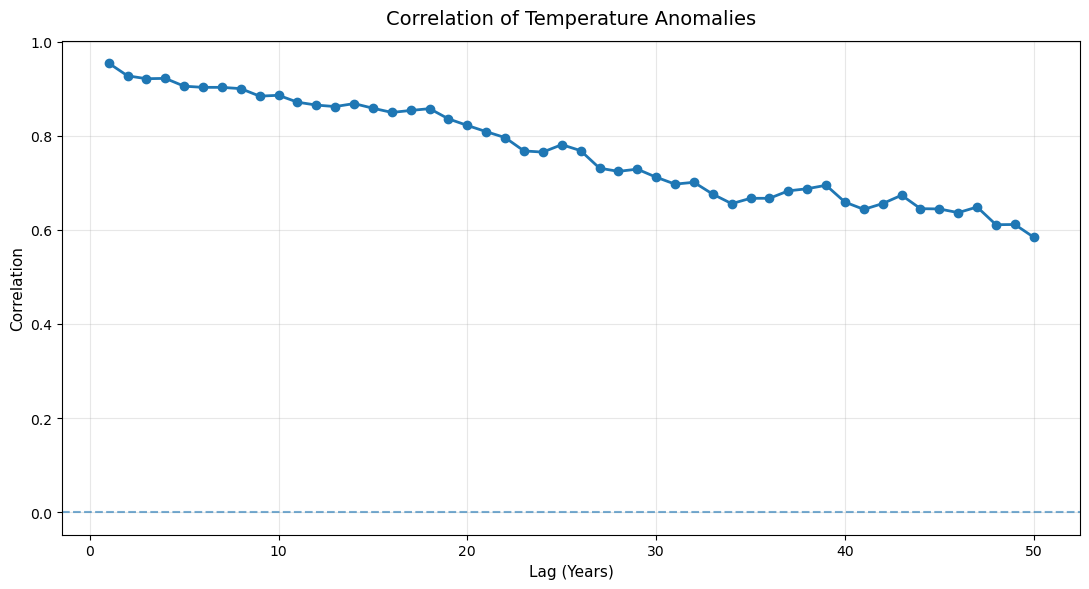

In [69]:
plt.figure(figsize=(11,6))

plt.plot(
    lags,
    autocorr,
    linewidth=2,
    marker='o'
)

plt.axhline(0, linestyle='--', alpha=0.6)

plt.xlabel("Lag (Years)", fontsize=11)
plt.ylabel("Correlation", fontsize=11)
plt.title(
    "Correlation of Temperature Anomalies",
    fontsize=14,
    pad=12
)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [70]:
plt.savefig("my_plot3.svg") 

<Figure size 640x480 with 0 Axes>

#### print out the correlation table to make sure values match and show correlation

In [83]:
autocorr_df = pd.DataFrame({
    'Lag': lags,
    'Correlation': autocorr
})


In [84]:
autocorr_df.head()

,Lag,Correlation
0,1,0.954146
1,2,0.927160
2,3,0.921046
3,4,0.921727
4,5,0.905150


In [85]:
autocorr_df.tail()

,Lag,Correlation
45,46,0.636530
46,47,0.648485
47,48,0.610885
48,49,0.611348
49,50,0.584242


### Conclusion: Autocorrelation shows that temperatures in consecutive years are strongly related, but as we look further into the past, that relationship weakens. This tells us that while natural cycles exist, the long-term warming trend dominates over decades. It shows that the effects of climate change are withstanding and will affect us for many years to come. 

## Question 4: Based on historical trends, what is the probability of exceeding a 1.5°C global mean anomaly by 2050 under accelerating warming scenarios?

#### fit linear and quadratic trends using all historical data

In [74]:
linear_coeffs = np.polyfit(year, temp_anomaly, 1)
quad_coeffs = np.polyfit(year, temp_anomaly, 2)

#### projection years from 2000 to 2050

In [75]:
plot_years = np.arange(2000, 2051)

#### linear and quadratic projections

In [76]:
linear_proj = np.polyval(linear_coeffs, plot_years)
quad_proj = np.polyval(quad_coeffs, plot_years)

#### Compute 5-year averages for projection

In [77]:
five_years = plot_years[::5]
linear_5yr = linear_proj[::5]
quad_5yr = quad_proj[::5]


#### critical threshold

In [78]:
threshold = 1.5

#### Highlight where projections exceed threshold

In [79]:
exceed_mask_linear = linear_5yr > threshold
exceed_mask_quad = quad_5yr > threshold

#### plot quadratic and threshold line

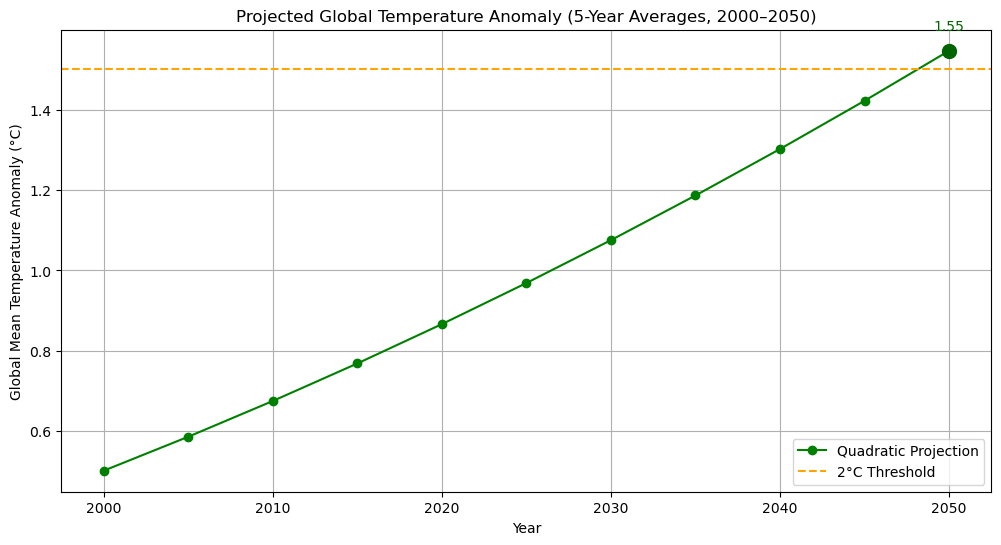

In [80]:
plt.figure(figsize=(12,6))

plt.plot(five_years, quad_5yr, '-o', label='Quadratic Projection', color='green')
plt.scatter(five_years[exceed_mask_quad], quad_5yr[exceed_mask_quad], color='darkgreen', s=100, zorder=5)
for x, y in zip(five_years[exceed_mask_quad], quad_5yr[exceed_mask_quad]):
    plt.text(x, y+0.05, f"{y:.2f}", ha='center', color='darkgreen')

plt.axhline(threshold, color='orange', linestyle='--', label='2°C Threshold')

plt.xlabel('Year')
plt.ylabel('Global Mean Temperature Anomaly (°C)')
plt.title('Projected Global Temperature Anomaly (5-Year Averages, 2000–2050)')
plt.legend()
plt.grid(True)
plt.show()


### Conclusion: This projection shows that the Earth will reach the critical point of a 1.5 degrees celcius flucuation in temperature. This means that current preventions are not enough, and we need to work faster before climate change is irreversible.

### Overall Conclusion:
### The analysis shows that global temperatures have been increasing steadily over time, with the rate of warming becoming faster in recent decades. This indicates that warming is not only happening, but accelerating.
### The periodic pattern analysis suggests that there are short-term ups and downs in temperature that repeat over several years. These fluctuations are likely related to natural climate variability. However, they occur on top of a much stronger long-term warming trend, meaning natural cycles alone cannot explain the overall rise in temperature. 


### Thank you!